# The Support Vector Machine Algorithm Implementation

**Support Vector Machine (SVM)** is a powerful and widely used machine learning algorithm for both classification and regression tasks. It is particularly effective in dealing with complex datasets and has shown remarkable performance in various applications such as image classification, text classification and bioinformatics. The key idea behind SVM is to find an optimal hyperplane that maximally separates different classes or, in the case of regression, fits the data points. SVMs use a mathematical concept known as the kernel function, which allows them to transform the input data into a higher-dimensional feature space, allowing for non-linear decision boundaries. This flexibility allows SVMs to capture complex relationships within the data. In addition, SVMs are known for their ability to handle high-dimensional data and cases with limited training samples. In this notebook, we will explore the basics of SVMs, understand the key concepts involved, and implement SVMs for both classification and regression tasks using the popular scikit-learn library. We will also draw insights from the book "Simplified Mathematics behind Support Vector Machines" by **Abdallah Benkadja**, which provides a comprehensive understanding of the mathematical foundations of SVM. By the end of this notebook, you will have a solid understanding of SVM and be equipped with the necessary knowledge to apply it to your own machine learning projects.

Here is The link "Simplified Mathematics behind Support Vector Machines" by Abdallah Benkadja : <a href="https://il.linkedin.com/posts/michael-mike-erlihson-phd-8208616_simplified-maths-of-support-vector-machine-activity-7063092676899782656-Yl_s">LINK </a>

The mathematical formulation of the problem consists of identifying the decision function $f:\mathbb{R}^p \rightarrow\{+1,-1\}$

The goal of the **SVM** is to determine the parametres of the hyperplane that separates the data into two classes $(+1 $ and $-1)$

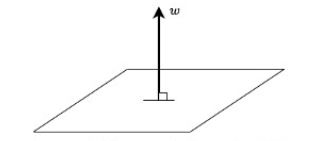

The vector $w \in \mathbb{R}^p\ $ represents the normal to the hyperplane and $ b $ represent the biais

so $f:\mathbb{R}^p \rightarrow\mathbb{R}$

$ \hspace{1,4cm} x\rightarrow <w,x>+b $

The goal of the **SVM** is to find the optimal values of the parametres $w$ and $b$ to define a hyperplane that separates the two classes in the data space effectively

it's easy to see that for any point in our data set we have $y_i(<w,x_i>+b) \geq 0$

However all this does not lead to unique solution , intuitively this can lead to a large number of solutions. **Hence the interet in the margin**, which adds an addotional constraint allowing the systeme to converge to a unique solution.

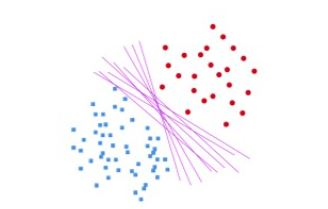

**The SVM Margin :**

The SVM margin is a fundamental concept in Support Vector Machines (SVM) that plays a crucial role in determining the optimal hyperplane for classification. The margin refers to the maximum width or distance between the decision boundary (hyperplane) and the closest data points from each class. The SVM aims to find the hyperplane that maximises this margin. The rationale behind maximising the margin is to ensure better generalisation and improve the classifier's ability to accurately handle new, unseen data. The data points that lie on the margin boundaries are called support vectors, as they directly influence the position and orientation of the hyperplane. SVM achieves robust and effective classification by focusing on these critical support vectors. By maximising the margin, SVM aims to achieve a balance between good class separation and avoiding overfitting. Thus, the SVM margin serves as a key aspect of the algorithm's optimisation process, resulting in improved performance and generalisation capabilities.

The equation for soft margin **SVM** lead us to the regularization term that will look like this : 

$\hspace{5cm} max\frac{2}{\lVert w \rVert}=max\frac{1}{\lVert w \rVert}$

$\hspace{3cm} \Longleftrightarrow \hspace{1.1cm} min\lVert w \rVert = min\frac{\lVert w \rVert^2}{2}$ 

This term is known as the regularizer which we need to use for maximizing the margin and minimizing the loss. 

When adding two terminologies for our gradient descent to work, ie, the number of errors in training(C), and the sum of the value of error($\sum\xi$) the equation can be written as:

$\hspace{5cm}  min\frac{\lVert w \rVert^2}{2}+\sum Ci\xi_i$ 

$\xi_i =max\{0,1-y_i(<w,x_i>+b)\}$

## Implementation :

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

## SVM on the Iris data :

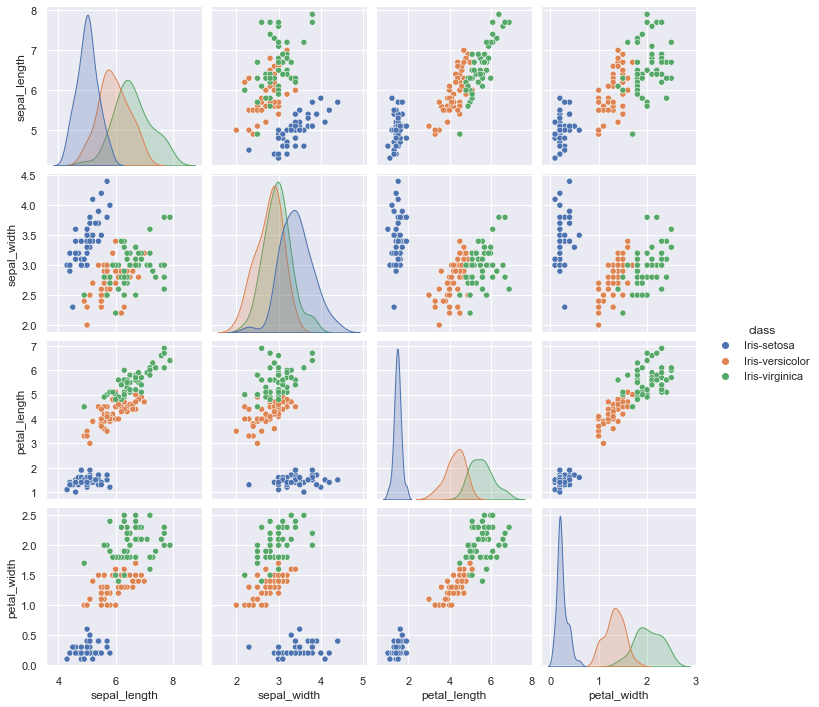

In [17]:
sns.set()

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

sns.pairplot(iris_df, hue='class')
plt.show()

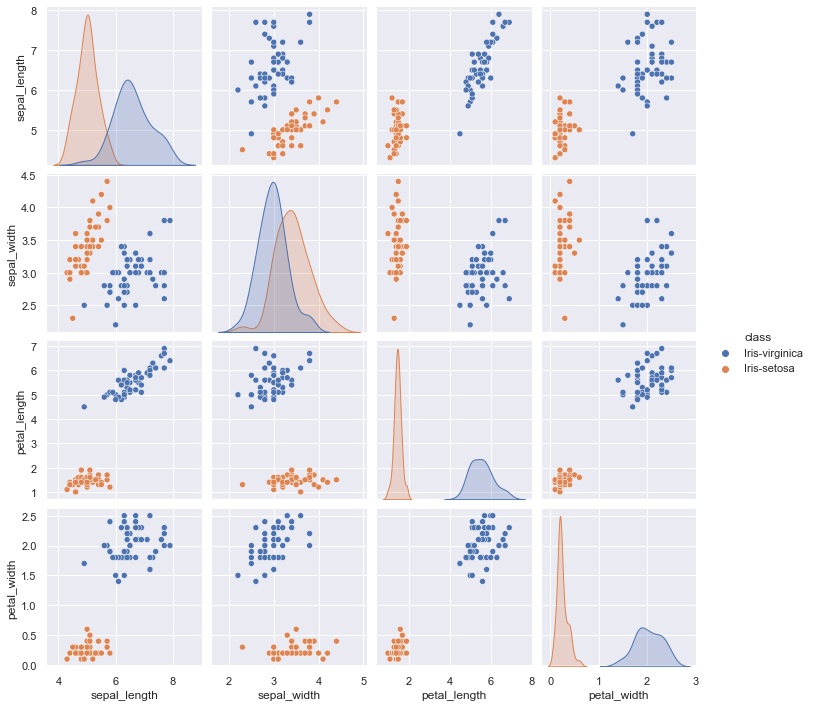

In [18]:
iris_df1=iris_df[iris_df['class']=='Iris-setosa']
iris_df2=iris_df[iris_df['class']=='Iris-virginica']
df=pd.concat([iris_df2,iris_df1])
sns.pairplot(df, hue='class')
plt.show()

𝐁𝐚𝐬𝐞𝐝 𝐨𝐧 𝐰𝐡𝐚𝐭 𝐰𝐞 𝐬𝐞𝐞 𝐡𝐞𝐫𝐞, 𝐢𝐭 𝐢𝐬 𝐨𝐛𝐯𝐢𝐨𝐮𝐬 𝐭𝐡𝐚𝐭 𝐭𝐡𝐞 𝐭𝐰𝐨 𝐢𝐫𝐢𝐬 𝐬𝐩𝐞𝐜𝐢𝐞𝐬 𝐜𝐚𝐧 𝐛𝐞 𝐬𝐞𝐩𝐚𝐫𝐚𝐭𝐞𝐝 𝐥𝐢𝐧𝐞𝐚𝐫𝐥𝐲.

In [231]:
X=df[['petal_length','petal_width']]
y=df['class'].map({'Iris-virginica':1,'Iris-setosa':-1})

In [232]:
X=X.reset_index()
y=y.reset_index()

In [233]:
X.drop(['index'],axis=1,inplace=True)
y.drop(['index'],axis=1,inplace=True)

In [234]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
95,-1
96,-1
97,-1
98,-1


In [235]:
X=np.array(X)
y=np.array(y)

In [236]:
y=[i[0] for i in y]

In [237]:
y=np.array(y)

### Training the SVM model

In [258]:
svm = SVM(n_iters=2000)

svm.fit(X, y)

In [259]:
w=svm.w
b=svm.b

### Visualizing SVM

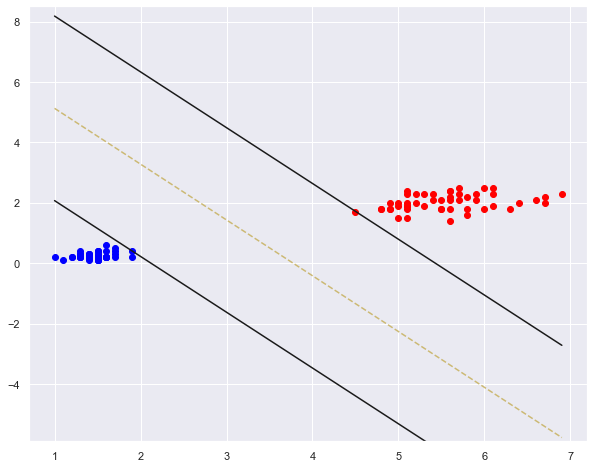

In [260]:
# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:50, 0], X[:50, 1],color='red')
    plt.scatter(X[50:, 0], X[50:, 1],color='blue')

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 6, x1_max + 6])

    plt.show()

visualize_svm()